In [3]:
# Standard Qiskit könyvtárak importálása
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# IBM Quantum fiók betöltése
service = QiskitRuntimeService(channel="ibm_quantum")

In [4]:
from qiskit import QuantumCircuit, execute, Aer

# quantumáramkör létrehozása
circuit = QuantumCircuit(1)

# Get the simulator backend
simulator = Aer.get_backend('qasm_simulator')

def apply_hadamard_and_measure(circuit, simulator,hanyszor):
    #Hadamard kapuk alkalmazása a qbitekre
    for i in range(hanyszor):
        circuit.h(0)

    # qubit megmérése
    circuit.measure_all()

    # szimulálás
    job = execute(circuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

In [5]:
#Más eredményt kapunk ha két kapuk között mérünk. Szuperpozíciót megzavarja a mérés.

# Függvény hívása a Hadamard kapu alkalmazásához és méréshez, majd az eredmények kiírása
counts1 = apply_hadamard_and_measure(circuit, simulator, 2)
print("Eredmények a két H kapu után:")
print(counts1)

# Függvény újra hívása a Hadamard kapu alkalmazásához és méréshez, majd az eredmények kiírása
counts2 = apply_hadamard_and_measure(circuit, simulator, 1)
print("Eredmények az első H kapu után:")
print(counts2)

# Függvény újra hívása a Hadamard kapu alkalmazásához és méréshez, majd az eredmények kiírása
counts3 = apply_hadamard_and_measure(circuit, simulator, 1)
print("Eredmények a második H kapu után:")
print(counts3)

Eredmények a két H kapu után:
{'0': 1024}
Eredmények az első H kapu után:
{'1 0': 483, '0 0': 541}
Eredmények a második H kapu után:
{'1 1 0': 261, '0 1 0': 267, '0 0 0': 241, '1 0 0': 255}


Statevector([-1.8369702e-16-1.j, -0.0000000e+00+0.j,  0.0000000e+00+0.j,
              0.0000000e+00+0.j],
            dims=(2, 2))


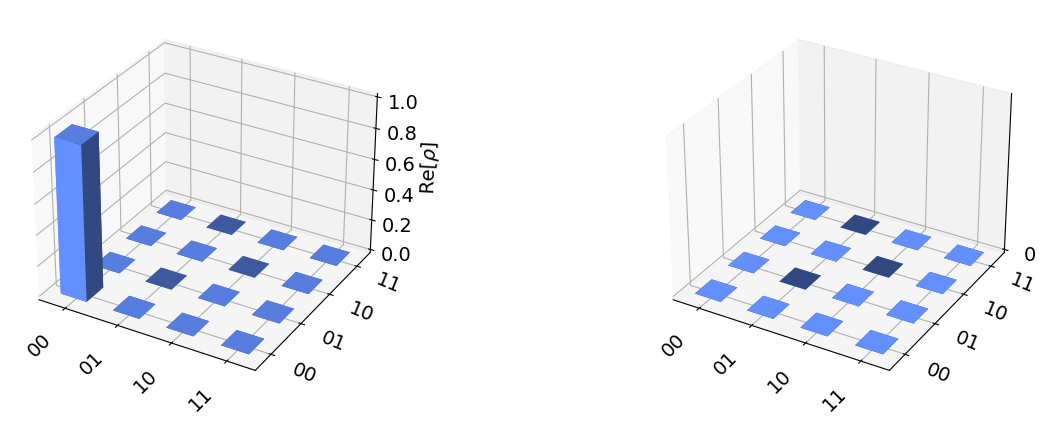

In [6]:
import numpy as np
from qiskit.visualization import plot_state_city

# Kvantumáramkör létrehozása 2 qubittel
circuit = QuantumCircuit(2)

# Pauli-X, Y, Z kapuk alkalmazása a qubitekre
circuit.x(0)
circuit.y(0)
circuit.z(1)

# Qubit mérése
circuit.measure_all()

stateVsim = Aer.get_backend('statevector_simulator')
# Áramkör futtatása a szimulátoron
feladat = execute(circuit, stateVsim, shots=1024)
eredmeny = feladat.result()
stateVector = eredmeny.get_statevector()
print(stateVector)
plot_state_city(stateVector)

In [7]:
from qiskit import QuantumCircuit, Aer, transpile

def set_quantum_state(qc, state):
    # Validate input state
    valid_states = [0, 1, 2, 3]
    if state not in valid_states:
        raise ValueError("Invalid state code. Choose from 0, 1, 2, or 3.")

    # Quantum circuit creation

    # Set the state according to the given state code
    if state == 0:
        qc.initialize([1, 0, 0, 0], [0, 1])  # |00>
    elif state == 1:
        qc.initialize([0, 1, 0, 0], [0, 1])  # |01>
    elif state == 2:
        qc.initialize([0, 0, 1, 0], [0, 1])  # |10>
    elif state == 3:
        qc.initialize([0, 0, 0, 1], [0, 1])  # |11>

    # Transpile the circuit
    transpiled_circuit = transpile(qc, Aer.get_backend('statevector_simulator'))

    # Run the transpiled circuit
    result = Aer.get_backend('statevector_simulator').run(transpiled_circuit).result()
    statevector = result.get_statevector()

    return statevector

# Example usage:
qc = QuantumCircuit(2)
state = 3  # Set to the |10> state, for example
result_statevector = set_quantum_state(qc, state)
print("Result state vector:", result_statevector)


Result state vector: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [8]:
from qiskit import Aer, transpile

def printStateVector(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    
    # Transpile the circuit
    transpiled_circuit = transpile(circuit, simulator)
    
    # Run the transpiled circuit
    result = simulator.run(transpiled_circuit).result()
    
    statevector = result.get_statevector()
    rounded_statevector = np.round(statevector, decimals=3)
    print("Rounded State Vector:", rounded_statevector)

In [12]:
# Exercise 2.2 QCCEA
from qiskit import QuantumCircuit, Aer, execute
from qiskit import QuantumCircuit, Aer, transpile, assemble

for i in range (0,4):
    print(f"\nKezdő állapot: {i}")
    # Szimulátor definiálása
    szimulator = Aer.get_backend('qasm_simulator')

    # HXH=Z----------------------------------------------------------------------
    circuit = QuantumCircuit(2)
    set_quantum_state(circuit,i)

    # Hadamard és Pauli-X kapu alkalmazása a qubitre
    circuit.h(0)
    circuit.x(0)
    circuit.h(0)

    # Qubit mérése
    circuit.measure_all()

    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"HXH:{counts}")
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)
#--------------------------------------------
    circuit = QuantumCircuit(2)
    # Pauli-Z kapu alkalmazása a qubitre
    set_quantum_state(circuit,i)
    circuit.z(0)

    # Qubit mérése
    circuit.measure_all()

    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"Z:{counts}")
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)

    # HYH=-Y---------------------------------------------------------------------
    # Hadamard kapu alkalmazása a qubitre
    circuit = QuantumCircuit(2)
    set_quantum_state(circuit,i)
    circuit.h(0)
    circuit.y(0)
    circuit.h(0)
    # Qubit mérése
    circuit.measure_all()

    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"HYH:{counts}")
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)
#--------------------------------------------
    circuit = QuantumCircuit(2)
    set_quantum_state(circuit,i)
    # Kapuk alkalmazása
    circuit.y(0)

    # Qubit mérése
    circuit.measure_all()    
    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"-Y:{counts}")
    
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)
    
    # HZH=X---------------------------------------------------------------------
    # Kapuk alkalmazása
    circuit = QuantumCircuit(2)
    set_quantum_state(circuit,i)
    circuit.h(0)
    circuit.z(0)
    circuit.h(0)
    
    # Qubit mérése
    circuit.measure_all()

    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"HZH:{counts}")
    
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)
#--------------------------------------------
    circuit = QuantumCircuit(2)
    set_quantum_state(circuit,i)
    # HZH=X
    circuit.x(0)
    
    # Qubit mérése
    circuit.measure_all()

    # Áramkör futtatása a szimulátoron
    feladat = execute(circuit, szimulator, shots=1)
    eredmény = feladat.result()
    counts = eredmény.get_counts(circuit)
    print(f"X:{counts}")
    #eredmény kiiratása állapotvectorokkal
    printStateVector(circuit)
    print(circuit)


Kezdő állapot: 0
HXH:{'00': 1}
Rounded State Vector: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
        ┌──────────────────────┐┌───┐┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤0                     ├┤ H ├┤ X ├┤ H ├─░─┤M├───
        │  Initialize(1,0,0,0) │└───┘└───┘└───┘ ░ └╥┘┌─┐
   q_1: ┤1                     ├────────────────░──╫─┤M├
        └──────────────────────┘                ░  ║ └╥┘
meas: 2/═══════════════════════════════════════════╩══╩═
                                                   0  1 
Z:{'00': 1}
Rounded State Vector: [ 1.+0.j -0.+0.j  0.+0.j -0.+0.j]
        ┌──────────────────────┐┌───┐ ░ ┌─┐   
   q_0: ┤0                     ├┤ Z ├─░─┤M├───
        │  Initialize(1,0,0,0) │└───┘ ░ └╥┘┌─┐
   q_1: ┤1                     ├──────░──╫─┤M├
        └──────────────────────┘      ░  ║ └╥┘
meas: 2/═════════════════════════════════╩══╩═
                                         0  1 
HYH:{'01': 1}
Rounded State Vector: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
        ┌──────────────────────┐┌───┐┌───┐┌───┐ ░ ┌─┐ 

In [97]:
# Exercise 2.1 QCCEA - HH=I
# Kvantumáramkör létrehozása egyetlen qubittel
circuit = QuantumCircuit(2)

set_quantum_state(circuit,2)

circuit.h(0)
circuit.h(0)
# Qubit mérése
circuit.measure_all()

# Áramkör futtatása a szimulátoron
feladat = execute(circuit, simulator, shots=1024)
eredmény = feladat.result()
counts = eredmény.get_counts(circuit)

print(counts)

circuit.i(0)

# Qubit mérése
circuit.measure_all()

feladat = execute(circuit, szimulátor, shots=1024)
eredmény = feladat.result()
counts = eredmény.get_counts(circuit)

print(counts)

{'10': 1024}
{'10 10': 1024}


In [98]:
# Exercise 2.1 QCCEA HH=I
# Kvantumáramkör létrehozása egyetlen qubittel
circuit = QuantumCircuit(2)

circuit.x(0)

# Qubit mérése
circuit.measure_all()
circuit.swap(1,0)
circuit.measure_all()

# Áramkör futtatása a szimulátoron
feladat = execute(circuit, simulator, shots=1024)
eredmény = feladat.result()
counts = eredmény.get_counts(circuit)

print(counts)
#3 CNOT = SWAP (in this configuration)
circuit.cx(0,1)
circuit.cx(1,0)
circuit.cx(0,1)

# Qubit mérése
circuit.measure_all()

feladat = execute(circuit, szimulátor, shots=1024)
eredmény = feladat.result()
counts = eredmény.get_counts(circuit)

print(counts)

{'10 01': 1024}
{'01 10 01': 1024}
